In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

import pickle

## Predict the onset of diabetes based on diagnostic measures

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Attribute Information:

Number of times pregnant

Plasma glucose concentration a 2 hours in an oral glucose tolerance test

Diastolic blood pressure (mm Hg)

Triceps skin fold thickness (mm)

2-Hour serum insulin (mu U/ml)

Body mass index (weight in kg/(height in m)^2)

Diabetes pedigree function

Age (years)

Class variable (0 or 1)

In [2]:
df = pd.read_csv('diabetes.csv') 

In [3]:
df.shape

(768, 9)

In [4]:
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
70,2,100,66,20,90,32.9,0.867,28,1
584,8,124,76,24,600,28.7,0.687,52,1
28,13,145,82,19,110,22.2,0.245,57,0
192,7,159,66,0,0,30.4,0.383,36,1
96,2,92,62,28,0,31.6,0.130,24,0
275,2,100,70,52,57,40.5,0.677,25,0
425,4,184,78,39,277,37.0,0.264,31,1
274,13,106,70,0,0,34.2,0.251,52,0
244,2,146,76,35,194,38.2,0.329,29,0
350,4,92,80,0,0,42.2,0.237,29,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.duplicated().sum()

0

In [9]:
df.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

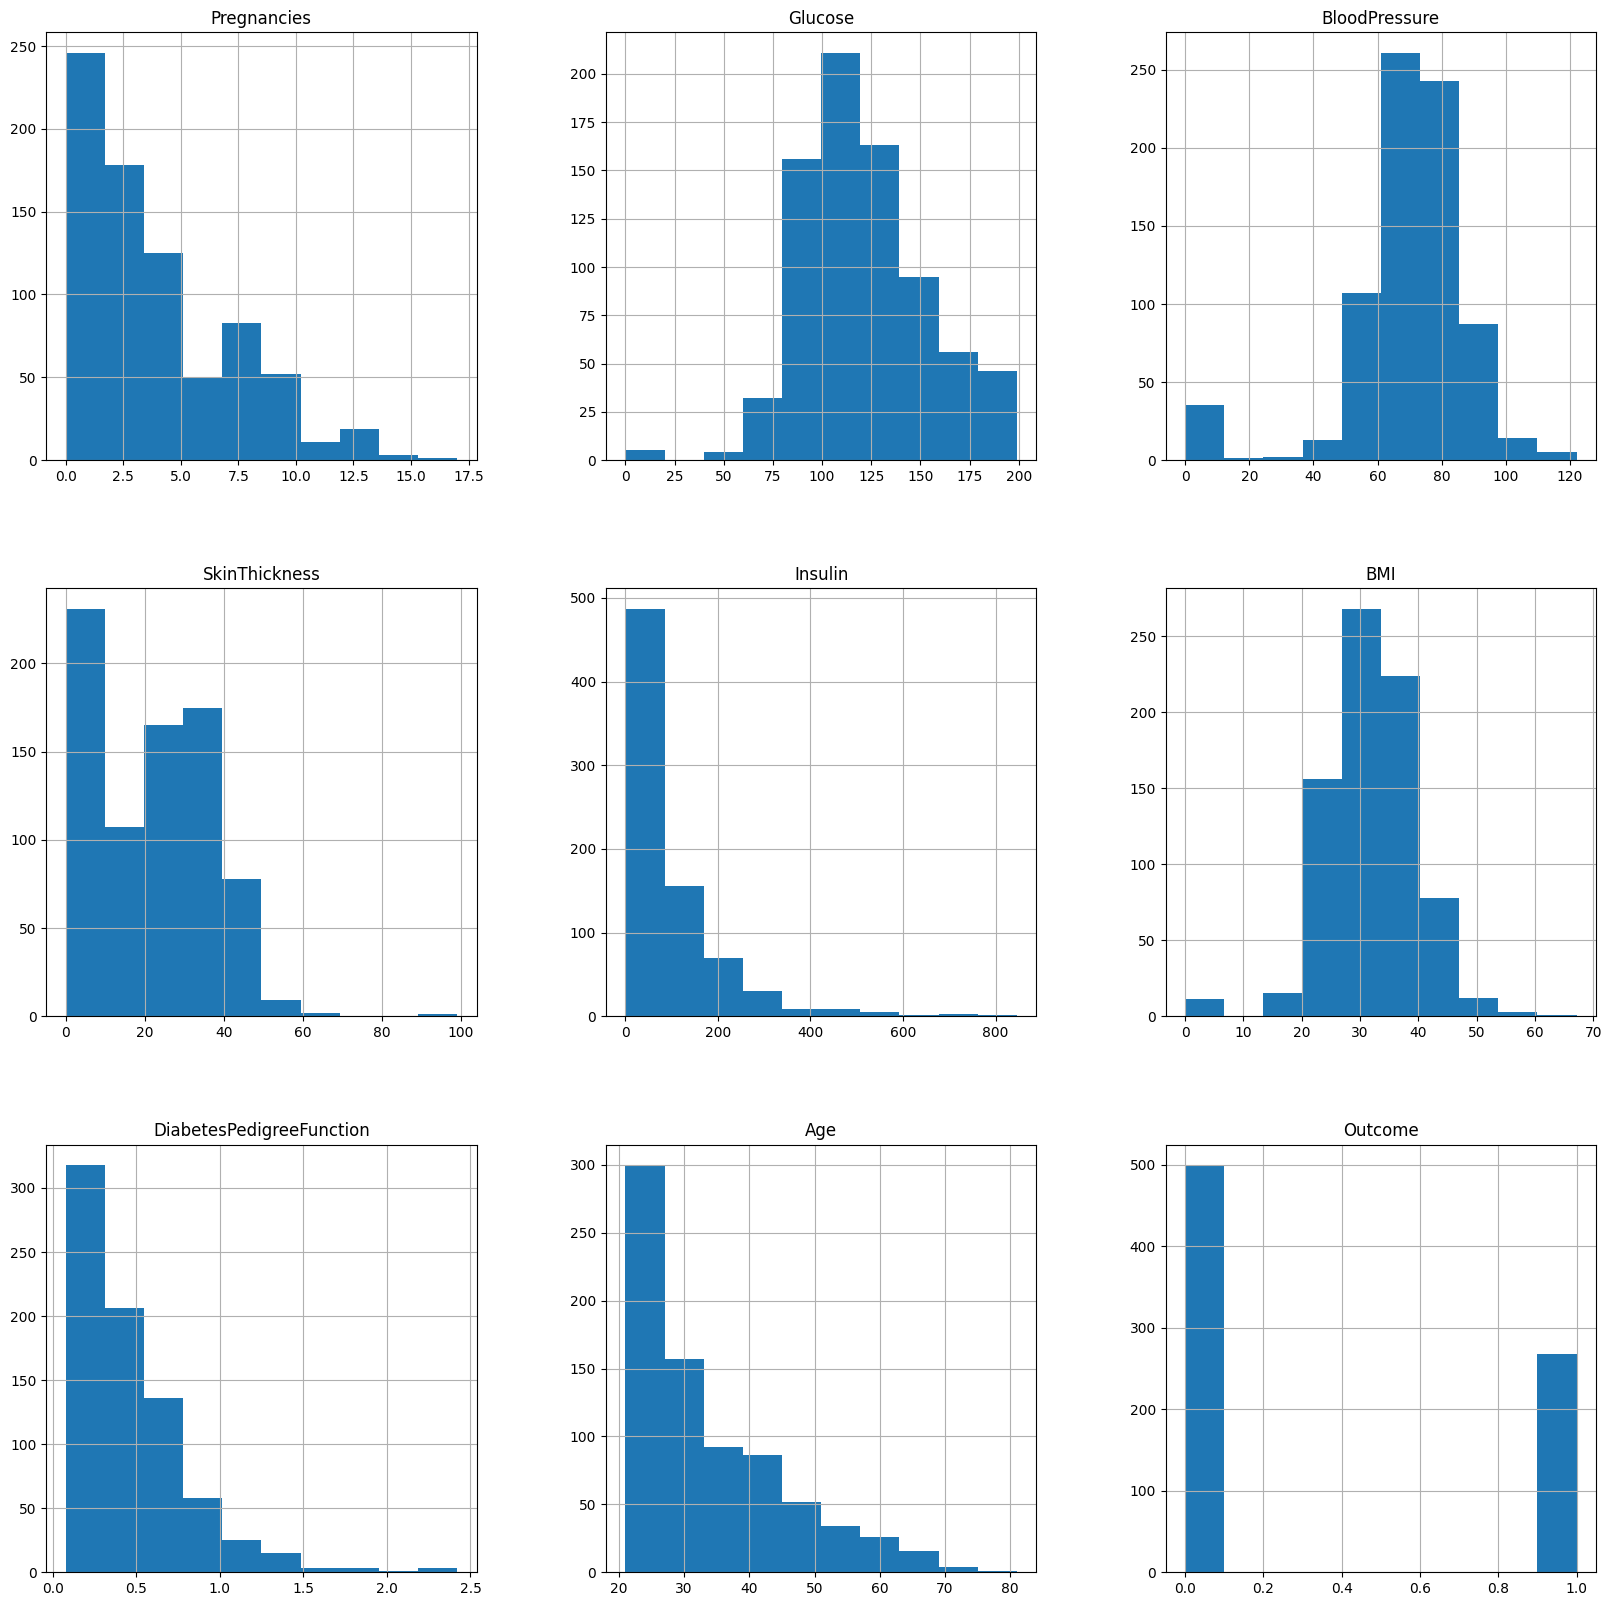

In [10]:
histogram = df.hist(figsize = (20,20))

In [11]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

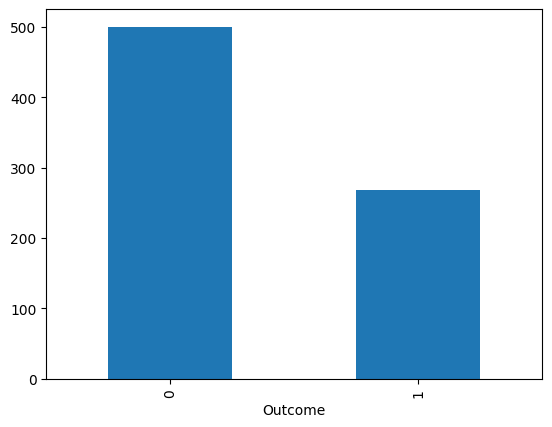

In [11]:
p=df.Outcome.value_counts().plot(kind="bar")

In [12]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [13]:
X.shape

(768, 8)

In [14]:
y.shape

(768,)

In [15]:
y.value_counts()


Outcome
0    500
1    268
Name: count, dtype: int64

In [16]:
smote=SMOTE(sampling_strategy='minority')

X_b,y_b=smote.fit_resample(X,y)

In [17]:
X_b.shape

(1000, 8)

In [18]:
X_b.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [107]:
X_b.shape

(1000, 8)

In [19]:
y_b.shape[0]

1000

In [20]:
y_b.value_counts()

Outcome
1    500
0    500
Name: count, dtype: int64

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X_b,y_b,test_size=0.2)

In [22]:
y_train.value_counts()

Outcome
1    404
0    396
Name: count, dtype: int64

In [23]:
y_test.value_counts()

Outcome
0    104
1     96
Name: count, dtype: int64

In [24]:
scaler = StandardScaler()

In [25]:
X_train = scaler.fit_transform(X_train)

In [26]:
X_test = scaler.transform(X_test)

In [37]:
X_train

array([[ 0.89142484,  1.01111324, -0.83204519, ..., -0.29827395,
         0.29557368,  0.43770402],
       [-0.89813569, -0.078995  , -0.51739799, ...,  0.3912599 ,
         0.075648  , -1.12707698],
       [ 0.29490466, -0.62404911,  0.63630841, ...,  0.87263258,
        -0.60196084,  0.35077174],
       ...,
       [-0.00335543,  0.58718226,  0.79363201, ..., -0.50643511,
        -0.89024179, -0.60548331],
       [-1.19639578, -0.44236441,  0.26922001, ...,  0.00972911,
        -0.63407571, -0.95321243],
       [-1.19639578, -1.8049997 ,  0.32166121, ...,  1.62721678,
        -0.87538195,  1.04622996]])

In [27]:
clf = LogisticRegression()

clf.fit(X_train,y_train)

LogisticRegression()

In [28]:
y_pred_train = clf.predict(X_train)

In [29]:
accuracy_score(y_train,y_pred_train)

0.74625

In [30]:
y_pred_test = clf.predict(X_test)

accuracy_score(y_test,y_pred_test)

0.76

In [31]:
clf2 = svm.SVC()

In [32]:
clf2.fit(X_train,y_train)

SVC()

In [33]:
y_pred_train = clf2.predict(X_train)

accuracy_score(y_train,y_pred_train)

0.81375

In [141]:
y_pred_test = clf2.predict(X_test)

accuracy_score(y_test,y_pred_test)

0.75

In [146]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = clf2.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.29467633  1.20881914  0.1095375  -0.10167311  0.8777028  -0.89312733
   0.27961955  1.52758835]]
[1]
The person is diabetic


C:\Users\samui\anaconda3\envs\ece715_projects\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [34]:
pickle.dump(clf,open('model.pkl','wb'))

In [2]:
pickle.dump(scaler, open('scaler.pkl','wb'))

NameError: name 'pickle' is not defined

NameError: name 'pickle' is not defined